In [1]:
import pandas as pd

In [2]:

df = pd.read_csv('sab-bma.csv')


In [3]:
df


,Refs,Reads
0,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...
1,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCCTCCGTTGTATCT...,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCCTCCGTTGTATCT...
2,AGTTAACGTCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGAG...,AGTTAACGCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGAGG...
3,GCCCAAGGGTACGCCCGCAGCGACGCAATTGGCGGAGTAAGCGCGT...,GCCCAAGGGTACGCCCGCAGCGACGCAATTGGCGGAGTAAGCGCGT...
4,GCACTGATGTAACTCATGGTACATCCGTCGCTGAGCGCCATTTTGT...,GCACTGATGTAACTCATGGTACATCCGTCGCTGAGCGCCATTTTGT...
...,...,...
9995,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGGTATATGGTC...,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGGTATATGGTC...
9996,GAAGTTTGGAACGTGTTCGTCCGCCAATTAAGGTTGGCTTCTAGTA...,GAAGTTTGGAACGTGTTCGTCCGCCAATTAAGGTTGGCTTCTAGTA...
9997,TGCATCCCGGACAACCGCAAGGGTGCATGGGCACCGCAATTCCCAA...,TGCATCCCGGACAACCGCAAGGGTGCATGGGCACCGCAATTCCCAA...
9998,ACTGGACGTCCTATGCTGGCATAATGAAACGACAACCTGTCTTCGA...,ACTGGACGTCCTATGCTGGCATAATGAAACGACAACCTGTCTTCGA...


In [4]:
from tqdm import tqdm


In [5]:
noisy_strands = [s.strip() for s in list(df['Reads'])]


In [6]:
ref_strands = [s.strip() for s in list(df['Refs'])]


In [7]:
import difflib


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import os

# use LaTeX fonts in the plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2021basic/bin/universal-darwin'

In [9]:
def print_diff(ref_strand, noisy_strand):
    global pairs
    global pairs_no_pos
    a, b = 0, 0

    # quadratic time, no heuristics
    for match in difflib.SequenceMatcher(None, ref_strand, noisy_strand, autojunk=False).get_matching_blocks():
        was = ref_strand[a:match.a]
        now = noisy_strand[b:match.b]
        
        a = match.a + match.size
        b = match.b + match.size
        
        if was == '' and now == '':
            pass
        else:
            # print('{}|{}'.format(was, now), end=', ')
            pairs += [(was, now, match.a)]
            pairs_no_pos += [(was, now)]



100%|██████████| 10000/10000 [00:00<00:00, 82937.44it/s]


[41, 116, 243, 258, 274, 294, 298, 324, 353, 356, 360, 375, 406, 425, 458, 468, 481, 504, 508, 570, 594, 599, 621, 624, 653, 714, 723, 726, 762, 786, 830, 848, 862, 871, 915, 935, 989, 992, 1018, 1052, 1110, 1083, 1125, 1147, 1146, 1230, 1193, 1246, 1269, 1279, 1311, 1358, 1341, 1350, 1443, 2075, 2031, 2024, 1998, 1965, 1974, 1935, 1881, 1860, 1884, 1867, 1796, 1791, 1823, 1752, 1715, 1681, 1713, 1662, 1634, 1633, 1593, 1585, 1598, 1556, 1518, 1541, 1466, 1468, 1450, 1380, 1347, 1392, 1371, 1366, 1296, 1273, 1286, 1262, 1226, 1186, 1180, 1171, 1168, 1150, 1100, 1113, 1104, 1103, 1033, 1053, 1049, 1040, 991, 1591]


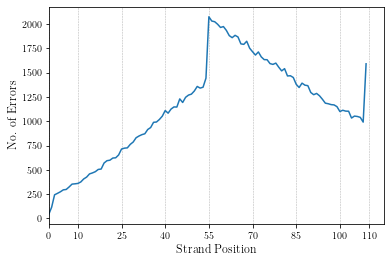

In [10]:
# Hamming Distance Graph
strand_len = 110
count_pos = [0] * (strand_len + 1)

def hamming(ref_strand, recons_strand):
    for i, (c1, c2) in enumerate(zip(ref_strand, recons_strand)):
        if c1 != c2:
            count_pos[i] += 1

for i in tqdm(range(len(ref_strands))):
    hamming(ref_strands[i], noisy_strands[i])

print(count_pos[:-1])
f = plt.figure()
plt.plot(range(strand_len), count_pos[:-1])
plt.xlabel(r'Strand Position', fontsize=12)
plt.ylabel(r'No. of Errors', fontsize=12)
plt.grid(axis = 'x', linestyle='--', linewidth = 0.5)
plt.xlim(0, 115)
plt.xticks([0, 10, 25, 40, 55, 70, 85, 100, 110])
plt.show()
f.savefig('cov5-sab-bma-hamming.pdf', bbox_inches='tight')

In [11]:
pairs = []
pairs_no_pos = []

for i in tqdm(range(len(ref_strands))):
    if ref_strands[i] != noisy_strands[i]:
        print_diff(ref_strands[i], noisy_strands[i])


100%|██████████| 10000/10000 [00:05<00:00, 1986.97it/s]


In [12]:

subs_no_pos, counts_no_pos = np.unique(pairs_no_pos, return_counts=True, axis=0)
sorting = np.argsort(counts_no_pos)
subs_no_pos = subs_no_pos[sorting]
counts_no_pos = counts_no_pos[sorting]

for sub, count in zip(subs_no_pos, counts_no_pos):
    if count > 5:
        print("{} -> {}".format(sub[0], sub[1]), count)


CTC ->  6
 -> TCT 6
 -> GCC 6
TG -> CC 6
TC -> AA 6
 -> TAT 6
TGC ->  6
CT -> AA 6
TCT ->  6
TAG ->  6
AG -> C 6
CG -> A 6
TTG ->  6
 -> CCC 6
CTG ->  6
 -> CCA 6
T -> ACA 6
 -> GGA 7
 -> AGC 7
 -> CTG 7
ATC ->  7
 -> AGA 7
CGT ->  7
CT -> AG 7
CC -> A 7
CT -> A 7
AA ->  8
GTG ->  8
GAT ->  8
GTT ->  8
 -> CAC 8
C -> AA 8
 -> ACA 8
TT -> A 8
CC ->  9
T -> AG 9
 -> CAA 9
TA -> G 9
G -> AA 9
GC -> A 9
T -> GA 9
G -> CA 10
 -> ATG 10
TCG ->  10
T -> CC 11
T -> GC 11
GT -> A 12
T -> AC 12
TG -> C 14
GT -> C 14
TC -> A 14
G -> AC 15
T -> CA 17
TG -> A 19
GG ->  20
AC ->  27
CA ->  29
AT ->  32
GA ->  33
 -> GG 34
 -> CG 37
AG ->  38
 -> AG 39
 -> TC 39
 -> TT 39
CG ->  39
 -> TG 40
 -> CT 40
 -> GT 40
 -> TA 43
TC ->  45
 -> GA 46
 -> CC 48
TA ->  50
 -> GC 52
 -> AA 53
GC ->  53
 -> CA 55
 -> AC 56
TT ->  59
 -> AT 60
A -> T 63
CT ->  66
G -> T 73
A -> G 74
GT ->  76
TG ->  82
C -> G 89
A -> C 92
C -> T 100
G -> A 315
G -> C 336
C -> A 443
T -> G 445
T -> C 481
T -> A 516
 -> T 684
C ->  7

G ->  @ 81 6
 -> ATG @ 55 6
 -> G @ 5 6
C -> A @ 63 6
 -> C @ 40 6
T ->  @ 15 6
G ->  @ 8 6
 -> C @ 42 6
G ->  @ 86 6
G ->  @ 87 6
 -> C @ 47 6
C -> A @ 57 6
 -> C @ 48 6
T ->  @ 17 6
 -> C @ 49 6
G -> C @ 16 6
 -> G @ 20 6
G ->  @ 95 6
T ->  @ 107 6
C -> A @ 52 6
 -> AC @ 56 6
 -> G @ 51 6
C ->  @ 91 6
 -> TG @ 56 6
C ->  @ 79 6
 -> TG @ 54 6
G ->  @ 89 6
 -> C @ 18 6
 -> C @ 19 6
C ->  @ 94 6
G ->  @ 98 6
G -> A @ 48 6
 -> C @ 21 6
C ->  @ 71 6
G -> A @ 69 6
G -> A @ 78 6
C ->  @ 80 6
C -> A @ 50 6
C -> A @ 75 6
 -> G @ 74 6
T ->  @ 108 6
 -> G @ 80 6
T ->  @ 11 6
G ->  @ 97 6
T ->  @ 10 6
C -> A @ 27 6
G ->  @ 100 6
C ->  @ 11 6
 -> A @ 80 6
 -> A @ 81 6
T -> G @ 42 6
T -> G @ 45 6
 -> A @ 88 6
T -> C @ 61 6
G ->  @ 37 6
T -> A @ 79 6
 -> A @ 25 6
T -> G @ 59 6
T -> G @ 68 6
C ->  @ 14 6
 -> T @ 58 6
T -> C @ 43 6
 -> A @ 16 6
G -> C @ 50 6
T -> C @ 57 6
C ->  @ 23 6
 -> A @ 79 6
T -> C @ 74 6
 -> A @ 49 6
 -> A @ 39 6
 -> A @ 37 6
 -> A @ 36 6
 -> CA @ 54 6
T -> A @ 60 6
G ->  @ 43

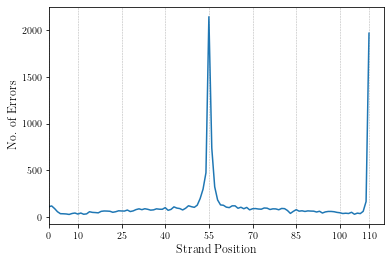

In [13]:
subs, counts = np.unique(pairs, return_counts=True, axis=0)
sorting = np.argsort(counts)
subs = subs[sorting]
counts = counts[sorting]

for sub, count in zip(subs, counts):
    if count > 5:
        print("{} -> {} @ {}".format(sub[0], sub[1], sub[2]), count)

strand_len = 110
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    pos_counts[int(sub[2])] += count

print(pos_counts)

f = plt.figure()
plt.plot(range(strand_len + 1), pos_counts)
plt.xlabel(r'Strand Position', fontsize=12)
plt.ylabel(r'No. of Errors', fontsize=12)
plt.grid(axis = 'x', linestyle='--', linewidth = 0.5)
plt.xlim(0, 115)
plt.xticks([0, 10, 25, 40, 55, 70, 85, 100, 110])
plt.show()
f.savefig('cov5-sab-bma-aligned.pdf', bbox_inches='tight')

In [14]:
subs, counts = np.unique(pairs, return_counts=True, axis=0)
sorting = np.argsort(counts)
subs = subs[sorting]
counts = counts[sorting]


In [15]:
def get_key(char1, char2):
    char1 = char1 if char1 != '' else '_'
    char2 = char2 if char2 != '' else '_'
    return char1 + ' -> ' + char2

strand_len = 110
pos_map = {}
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    key = get_key(sub[0], sub[1])
    if key not in pos_map:
        pos_map[key] = [0] * (strand_len + 1)
    pos_map[key][int(sub[2])] += count

In [16]:
sub_keys = [get_key(sub[0], sub[1]) for sub in subs_no_pos]
max_10_keys = sub_keys[-10:]
max_10_counts = counts_no_pos[-10:]


[0, 1, 1, 2, 1, 1, 3, 4, 6, 3, 4, 6, 4, 2, 5, 7, 5, 3, 7, 7, 6, 5, 8, 5, 5, 9, 6, 7, 3, 9, 8, 6, 8, 8, 4, 11, 9, 6, 5, 7, 8, 10, 7, 6, 8, 9, 7, 0, 15, 12, 9, 10, 16, 5, 25, 86, 67, 25, 9, 15, 11, 7, 4, 10, 11, 3, 8, 6, 7, 4, 13, 2, 4, 10, 8, 5, 0, 7, 5, 8, 9, 6, 7, 5, 3, 5, 6, 6, 8, 6, 4, 4, 3, 5, 5, 6, 2, 6, 6, 2, 6, 5, 3, 3, 10, 5, 5, 3, 16, 20, 565]
[46, 38, 17, 1, 4, 5, 3, 3, 1, 8, 5, 4, 3, 1, 10, 2, 6, 3, 4, 4, 4, 5, 4, 3, 7, 6, 7, 1, 5, 7, 10, 4, 5, 11, 7, 5, 6, 6, 11, 6, 11, 5, 7, 9, 4, 7, 4, 8, 10, 6, 12, 14, 20, 36, 43, 325, 84, 22, 13, 8, 11, 8, 5, 9, 10, 8, 9, 11, 3, 7, 9, 6, 13, 7, 3, 6, 4, 10, 6, 6, 6, 6, 7, 3, 5, 5, 7, 11, 6, 4, 3, 7, 3, 7, 0, 4, 5, 4, 2, 3, 5, 2, 6, 3, 4, 2, 4, 4, 6, 33, 4]
[0, 18, 21, 21, 6, 6, 2, 2, 7, 4, 6, 6, 8, 5, 7, 6, 7, 6, 11, 7, 7, 6, 5, 5, 10, 6, 7, 11, 8, 5, 13, 8, 17, 14, 7, 8, 6, 8, 6, 8, 11, 8, 6, 13, 11, 7, 8, 8, 7, 12, 4, 13, 8, 17, 17, 71, 65, 27, 15, 11, 12, 9, 10, 12, 7, 9, 8, 8, 8, 10, 8, 11, 8, 11, 8, 11, 14, 11, 8, 8, 8, 13, 7, 2, 1

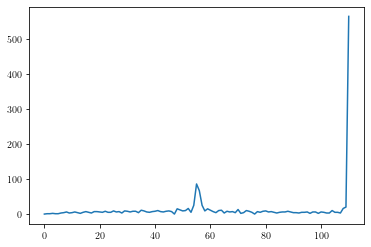

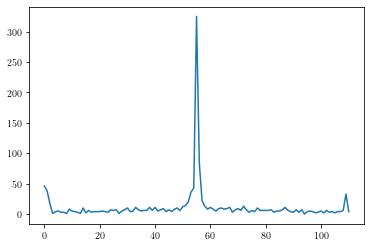

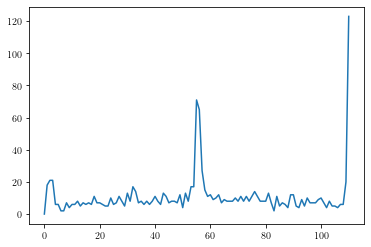

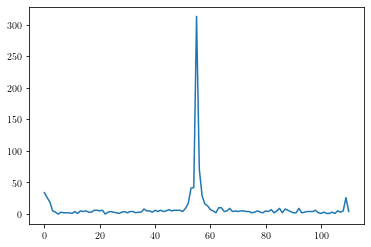

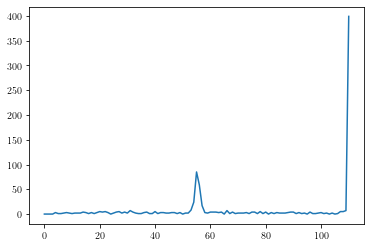

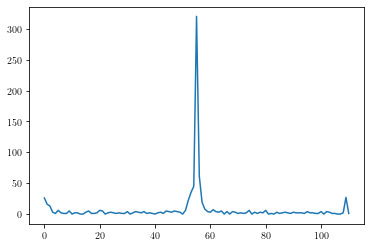

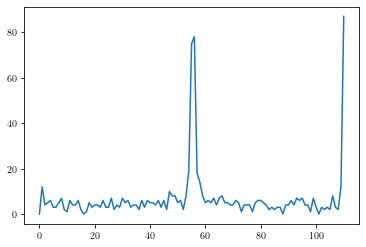

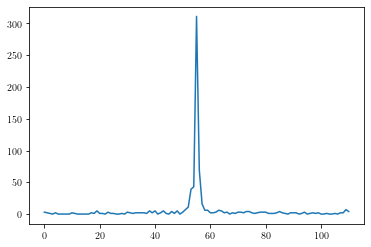

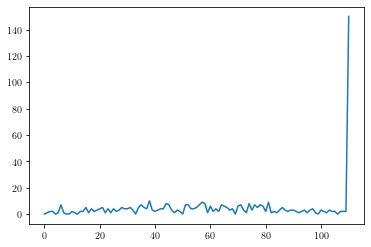

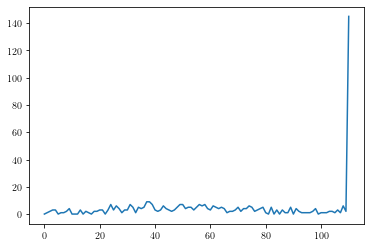

In [17]:
for key, count in zip(reversed(max_10_keys), reversed(max_10_counts)):
    plt.figure(key)
    print(pos_map[key])
    plt.plot(range(strand_len + 1), pos_map[key])

In [18]:
np.save('subs.npy', subs)
np.save('counts.npy', counts)